In [144]:
"""
Machine Learning Courework

This coursework assesses ability to demonstrate understanding of a wide range of machine learning techniques, their strengths and
their limitations, and write code in a relevant programming language and employ software libraries to solve problems
in machine learning. For this coursework you will be selecting, implementing, and evaluating classification methods for a
given scenario and dataset.

Scenario: You are given a dataset of images, each of which has been classified as either ‘rainy’ or ‘shine’. You must carry out an
experiment to compare the performance of at least two different classification methods on this dataset. 

The deliverable is an individual report with a 3-page maximum detailing your experiment and results –
this is a hard limit however your references will not count to this maximum.

Report structure:
Introduction: Excellent introduction detailing the scenario, objective and the process in a succinct manner. 5%
Method Selection: Excellent description of at least two appropriate methods with good justifications. 10%
Model Training: Excellent overview of data, process and justifications for training and hyperparameter tuning. 25%
Model Evaluation: Excellent overview of the evaluation process and data with suitable and justified metrics. 25%
Results: Excellent analysis and presentation of the results with good contextualisation and interpretation. 25%
Conclusions: Contextualised conclusions with clear links to results leading to potential future work. 10%

Classification methods I have learnt about:
1. Support Vector Machines (SVM)
2. Decision Trees
3. Random Forest
4. K-Nearest Neighbours (KNN)
5. Naive Bayes
6. Neural Networks
7. Logistic regression

features.npy – Contains the flattened images. Each row consists of 45000 columns each
representing a pixel value in the original image. classes.npy – Contains the respective classifications for the images found in ‘features.npy’, these
are 0 for ‘rainy’ images and 1 for ‘shine’ images. 248 ‘shine’ images and 299 ‘rain’ images"""

'\nMachine Learning Courework\n\nThis coursework assesses ability to demonstrate understanding of a wide range of machine learning techniques, their strengths and\ntheir limitations, and write code in a relevant programming language and employ software libraries to solve problems\nin machine learning. For this coursework you will be selecting, implementing, and evaluating classification methods for a\ngiven scenario and dataset.\n\nScenario: You are given a dataset of images, each of which has been classified as either ‘rainy’ or ‘shine’. You must carry out an\nexperiment to compare the performance of at least two different classification methods on this dataset. \n\nThe deliverable is an individual report with a 3-page maximum detailing your experiment and results –\nthis is a hard limit however your references will not count to this maximum.\n\nReport structure:\nIntroduction: Excellent introduction detailing the scenario, objective and the process in a succinct manner. 5%\nMethod Se

In [145]:
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from tabulate import tabulate
import matplotlib.pyplot as plt

features = np.load("features.npy")
labels = np.load("classes.npy")

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

image_height = 100
image_width = 150
num_channels = 3


In [146]:
from tabulate import tabulate
import csv
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

def evaluate_models(models, X_test, y_test, print_confusion_matrix=False, print_roc_curve=False):
    results = []

    for model_name, model in models:
        if model_name == "CNN":
            y_pred = np.argmax(model.predict(X_test), axis=1)
            y_score = model.predict(X_test)[:, 1].ravel()
        else:
            # Reshape input data for non-CNN models
            X_test_flat = X_test.reshape(X_test.shape[0], -1)
            y_pred = model.predict(X_test_flat)
            y_score = model.predict_proba(X_test_flat)[:,1]
        
        accuracy = "{:.4f}".format(accuracy_score(y_test, y_pred))
        precision = "{:.4f}".format(precision_score(y_test, y_pred))
        recall = "{:.4f}".format(recall_score(y_test, y_pred))
        f1 = "{:.4f}".format(f1_score(y_test, y_pred))
        auc_roc = "{:.4f}".format(roc_auc_score(y_test, y_score))
        
        # Convert predictions and test labels to "rain" and "shine" labels
        y_pred_labels = ["shine" if pred == 1 else "rain" for pred in y_pred]
        y_test_labels = ["shine" if label == 1 else "rain" for label in y_test]

        if print_confusion_matrix:
            print(f"Confusion Matrix for {model_name}:")
            print(confusion_matrix(y_test_labels, y_pred_labels))
        
        results.append([model_name, accuracy, precision, recall, f1, auc_roc])

    # Sort results based on F1 score in descending order
    results.sort(key=lambda x: float(x[4]), reverse=True)

    # Create a table
    table = tabulate(results, headers=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'], tablefmt='grid')

    print(table)

    # Save the table to a file
    with open('model_performance.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])
        for result in results:
            writer.writerow(result)

    # Plot ROC curves 
    if print_roc_curve:
        plt.figure(figsize=(10, 6))
        for model_name, model in models:
            if model_name == "CNN":
                y_score = model.predict(X_test)[:, 1].ravel()
            else:
                y_score = model.predict_proba(X_test_flat)[:,1]
            fpr, tpr, _ = roc_curve(y_test, y_score)
            plt.plot(fpr, tpr, label=model_name)

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()


In [147]:
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [148]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [149]:
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [150]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [151]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [152]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [157]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np

# Reshape input data
X_train = X_train.reshape(-1, image_height, image_width, num_channels)
X_test = X_test.reshape(-1, image_height, image_width, num_channels)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define a list of CNN models with different configurations
cnn_models = []

for i in range(20):  # Create 3 different versions of the model
    cnn_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(2, activation='softmax')  # Assuming binary classification (rainy and shine)
    ])

    cnn_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    
    cnn_models.append(cnn_model)

# Train each model
histories = []
for i, model in enumerate(cnn_models):
    print(f"Training model {i+1}...")
    history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val))
    histories.append(history)

# Evaluate models on test set
test_accuracies = []
for i, model in enumerate(cnn_models):
    print(f"Evaluating model {i+1}...")
    test_loss, test_acc = model.evaluate(X_test, y_test)
    test_accuracies.append(test_acc)

# Choose the best model based on test accuracy
best_model_index = np.argmax(test_accuracies)
cnn_model = cnn_models[best_model_index]
cnn_model_history = histories[best_model_index]

# Save the best model
cnn_model.save("best_cnn_model.h5")
print("Best model saved.")

c:\Users\thoma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Training model 1...
Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.5442 - loss: 227.4769 - val_accuracy: 0.4429 - val_loss: 4.5184
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.7194 - loss: 1.5037 - val_accuracy: 0.6857 - val_loss: 0.6151
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.8939 - loss: 0.2673 - val_accuracy: 0.9286 - val_loss: 0.2020
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.9022 - loss: 0.2573 - val_accuracy: 0.7143 - val_loss: 0.5786
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.7752 - loss: 0.5525 - val_accuracy: 0.6429 - val_loss: 0.5720
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.6954 - loss: 0.5916 - val_accuracy: 0.8857 - val_loss: 0.3037
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.7841 - loss: 0.5974 - val_accuracy: 0.9143 - val_loss: 0.7654
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.7679 - loss: 1.0924 - val_accura

Best model saved.


Confusion Matrix for SVM:
[[66  1]
 [ 1 42]]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Confusion Matrix for CNN:
[[66  1]
 [ 3 40]]
Confusion Matrix for Random Forest:
[[67  0]
 [ 7 36]]
Confusion Matrix for Decision Tree:
[[57 10]
 [ 4 39]]
Confusion Matrix for KNN:
[[66  1]
 [ 7 36]]
Confusion Matrix for Naive Bayes:
[[58  9]
 [ 4 39]]
Confusion Matrix for Logistic Regression:
[[56 11]
 [ 2 41]]
+---------------------+------------+-------------+----------+------------+-----------+
| Model               |   Accuracy |   Precision |   Recall |   F1 Score |   AUC-ROC |
+=====================+============+=============+==========+============+===========+
| SVM                 |     0.9818 |      0.9767 |   0.9767 |     0.9767 |    0.9844 |
+---------------------+------------+-------------+----------+------------+-----------+
| CNN                 |     0.9636 |      0.9756 |   0.9302 |     0.9524 |    0.9927 |
+---------------------+------------+-------

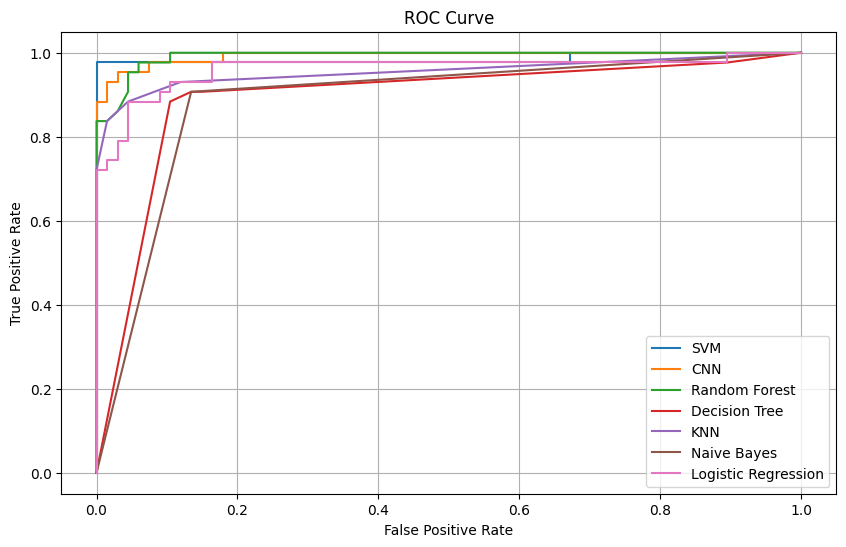

In [159]:
models = [("SVM", svm_model), ("CNN", cnn_model), ("Random Forest", rf_model), ("Decision Tree", dt_model), ("KNN", knn_model), ("Naive Bayes", nb_model), ("Logistic Regression", lr_model)]
evaluate_models(models, X_test, y_test, print_confusion_matrix=True, print_roc_curve=True)

In [155]:
#print("Model Evaluation Results:")
#print(tabulate(results, headers=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "Classification Report"]))
